# Plot ToE for IPSL-CM5A-LR, r2i1p1, compare pressure and density analyses

In [1]:
import sys
sys.path.append("/home/ysilvy/Density_bining/Yona_analysis/programs/")
import numpy as np
from netCDF4 import Dataset as open_ncfile
from maps_matplot_lib import defVarmme, zon_2Dz, custom_div_cmap, zonal_2D
#from modelsDef import defModels 
import glob
import matplotlib.pyplot as plt
import datetime

In [2]:
indirz = '/home/ysilvy/Density_bining/Yona_analysis/data/toe_zonal_z/toe_rcp85_histNat/'
indirr = '/home/ysilvy/Density_bining/Yona_analysis/data/toe_zonal/toe_rcp85_histNat/'

In [30]:
varname = defVarmme('salinity'); v = 'S'
#varname = defVarmme('temp'); v = 'T'
var = varname['var_zonal_w/bowl']
legVar = varname['legVar']
unit = varname['unit']
minmax = varname['minmax_zonal_rcp85']
multstd = 2 

if v=='S':
    varName = 'salinity'
else:
    varName = 'temperature'

In [15]:
filez = 'cmip5.IPSL-CM5A-LR.r2i1p1.'+legVar+'_toe_zonal_rcp_histNat.nc'
fz = open_ncfile(indirz+filez,'r')

In [16]:
filez

'cmip5.IPSL-CM5A-LR.r2i1p1.Salinity_toe_zonal_rcp_histNat.nc'

In [17]:
model = {'name':'IPSL-CM5A-LR'  ,'props':[6,3,11,156], 'picontrol':[1000],'correctFile':[0,0,0],
          'file_end_hist':'v20111119', 'file_end_histNat':'v20120430',
          'hist-rcp85':['r2i1p1','r3i1p1','r4i1p1']}
tstart = model['props'][2]
tend = model['props'][3]
model_name = filez.split('.')[1]
run = filez.split('.')[2]

In [31]:
varName

'salinity'

In [19]:
toe2z = fz.variables[varName+'ToE2_z'][:,:,:] + 1860
depth = fz.variables['depth'][:]
lat = fz.variables['latitude'][:]
lev = fz.variables['density'][:]

In [20]:
# Read gamma(z)
f = open_ncfile('/data/ysilvy/CMIP5_annual/so_thetao_gamma_Oan_IPSL-CM5A-LR_historical-rcp85_r2i1p1_185001-210012.nc')
density = np.ma.average(f.variables['density'][tstart:tend+95,:,:,:],axis=0)

## Plot ToE in original pressure coordinate

In [76]:
toe2z = fz.variables[varName+'ToE2_z'][:,:,:] + 1860

# -- Plot parameters
lat2d,depth2d, = np.meshgrid(lat,depth)
model_name = filez.split('.')[1]
run = filez.split('.')[2]

# -- Make variable bundles for each basin
varAtlz = {'name': 'Atlantic', 'var_change': toe2z[1,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[1,:,:]}
varPacz = {'name': 'Pacific', 'var_change': toe2z[2,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[2,:,:]}
varIndz = {'name': 'Indian', 'var_change': toe2z[3,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[3,:,:]}

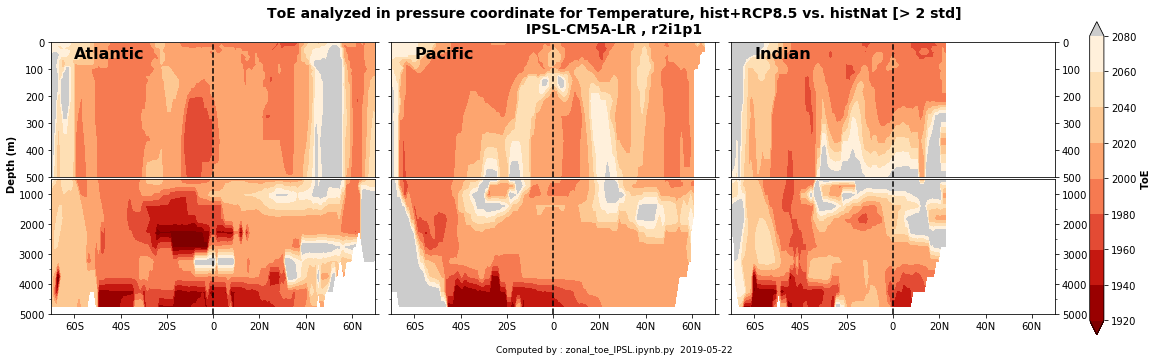

In [78]:
# -- Create figure and axes instances
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 5))

deltat=20
minyear=1920
domzed = [0,500,5000]
# -- Color map
cmap = 'OrRd_r'
# -- Unit
unit = 'ToE'
# -- Levels
minmax = [minyear, 2080.01, deltat]
levels = np.arange(minmax[0], minmax[1], minmax[2])
ext_cmap = 'both'
# -- Put everything into a dictionary
contourDict = {'cmap':cmap, 'levels':levels, 'levels2':levels, 'ext_cmap':ext_cmap, 'isopyc':False}

# -- Contourf
# Atlantic
cnplot = zon_2Dz(plt, axes[0,0], axes[1,0], 'left', lat, depth, varAtlz,
                  contourDict, domzed, None, None)
cnplot[0].cmap.set_over('0.8')
cnplot[1].cmap.set_over('0.8')

# -- Add colorbar
cb = fig.colorbar(cnplot[1], ax=axes.ravel().tolist(), ticks=levels, fraction=0.015, shrink=2.0, pad=0.05)
cb.set_label('%s' % (unit,), fontweight='bold')

# Pacific
cnplot = zon_2Dz(plt, axes[0,1], axes[1,1], 'mid', lat, depth, varPacz,
                  contourDict, domzed, None, None)
cnplot[0].cmap.set_over('0.8')
cnplot[1].cmap.set_over('0.8')

# Indian
cnplot = zon_2Dz(plt, axes[0,2], axes[1,2], 'right', lat, depth, varIndz,
                  contourDict, domzed, None, None)
cnplot[0].cmap.set_over('0.8')
cnplot[1].cmap.set_over('0.8')

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)


# -- Add title
plotTitle = 'ToE analyzed in pressure coordinate for ' + legVar + ', hist+RCP8.5 vs. histNat [> ' + str(multstd) + ' std]' \
    '\n %s , %s '%(model_name,run)

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.figtext(.5,.02,'Computed by : zonal_toe_IPSL.ipynb.py  '+date,fontsize=9,ha='center')
plt.figtext(.004,.6,'Depth (m)',rotation='vertical',fontweight='bold')

figureDir = 'models/ToE_z_analysis/'
plotName = 'toe'+v+'_z_IPSL_r2i1p1_rcp85vshistNat'
#if fig == 'save':
#plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.pdf', bbox_inches='tight')

# Plot signal in original pressure coordinate 

In [21]:
# Read signal
signal = fz.variables[varName+'_change'][:]

In [22]:
# -- Plot parameters
lat2d,depth2d, = np.meshgrid(lat,depth)
model_name = filez.split('.')[1]
run = filez.split('.')[2]

# -- Make variable bundles for each basin
varAtl = {'name': 'Atlantic', 'var_change': signal[1,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[1,:,:]}
varPac = {'name': 'Pacific', 'var_change': signal[2,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[2,:,:]}
varInd = {'name': 'Indian', 'var_change': signal[3,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[3,:,:]}

/home/ysilvy/.conda/envs/cdat81/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


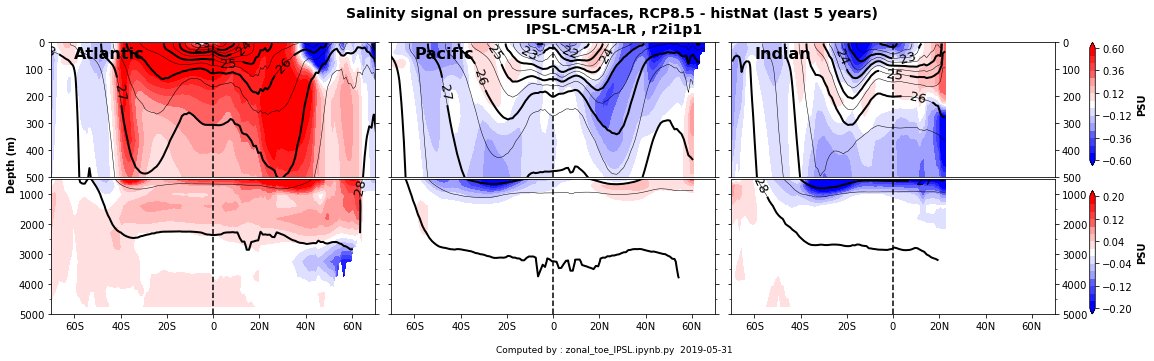

In [23]:
# -- Create figure and axes instances
fig2, axes2 = plt.subplots(nrows=2, ncols=3, figsize=(17, 5))

deltat=10
domzed = [0,500,5000]
# -- Color map
cmap = custom_div_cmap()
# -- Unit
unit = varname['unit']
# -- Levels
minmax = varname['minmax_zonal_rcp85']
levels = np.linspace(minmax[0], minmax[1], minmax[2])
minmax2 = varname['minmax_zonal']
levels2 = np.linspace(minmax2[0], minmax2[1], minmax2[2])
ext_cmap = 'both'
# -- Put everything into a dictionary
contourDict = {'cmap':cmap, 'levels':levels, 'levels2':levels2, 'ext_cmap':ext_cmap, 'isopyc':True}

# -- Contourf
# Atlantic
cnplot2 = zon_2Dz(plt, axes2[0,0], axes2[1,0], 'left', lat, depth, varAtl,
                  contourDict, domzed, None, None)

# -- Add colorbar
cb1 = fig2.colorbar(cnplot2[0], ax=[axes2[0,0],axes2[0,1],axes2[0,2]], ticks=levels[::3], fraction=0.015, shrink=1.0, pad=0.05)
cb1.set_label('%s' % (unit,), fontweight='bold')
cb2 = fig2.colorbar(cnplot2[1], ax=[axes2[1,0],axes2[1,1],axes2[1,2]], ticks=levels2[::3], fraction=0.015, shrink=1.0, pad=0.05)
cb2.set_label('%s' % (unit,), fontweight='bold')

# Pacific
cnplot2 = zon_2Dz(plt, axes2[0,1], axes2[1,1], 'mid', lat, depth, varPac,
                  contourDict, domzed, None, None)

# Indian
cnplot2 = zon_2Dz(plt, axes2[0,2], axes2[1,2], 'right', lat, depth, varInd,
                  contourDict, domzed, None, None)

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)


# -- Add title
plotTitle = legVar + ' signal on pressure surfaces, RCP8.5 - histNat (last 5 years) \n %s , %s '%(model_name,run)

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.figtext(.5,.02,'Computed by : zonal_toe_IPSL.ipynb.py  '+date,fontsize=9,ha='center')
plt.figtext(.004,.6,'Depth (m)',rotation='vertical',fontweight='bold')

figureDir = 'models/ToE_z_analysis/'
plotName = 'signal_z_IPSL_r2i1p1_rcp85vshistNat'
#if fig == 'save':
#plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.pdf', bbox_inches='tight')

# Same but signal over last 20 years

In [27]:
fhn = open_ncfile('/data/ysilvy/CMIP5_annual/so_thetao_gamma_Oan_IPSL-CM5A-LR_historicalNat_r2i1p1_185001-201012.nc','r')
frcp = open_ncfile('/data/ysilvy/CMIP5_annual/so_thetao_gamma_Oan_IPSL-CM5A-LR_historical-rcp85_r2i1p1_185001-210012.nc','r')

var_hn = np.ma.average(fhn.variables[varName][tstart:tend,:,:,:],axis=0)
var_rcp = np.ma.average(frcp.variables[varName][-20:,:,:,:],axis=0)
var_signal = var_rcp - var_hn

In [29]:
model_name = filez.split('.')[1]
run = filez.split('.')[2]

# -- Make variable bundles for each basin
varAtl = {'name': 'Atlantic', 'var_change': var_signal[1,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[1,:,:]}
varPac = {'name': 'Pacific', 'var_change': var_signal[2,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[2,:,:]}
varInd = {'name': 'Indian', 'var_change': var_signal[3,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[3,:,:]}

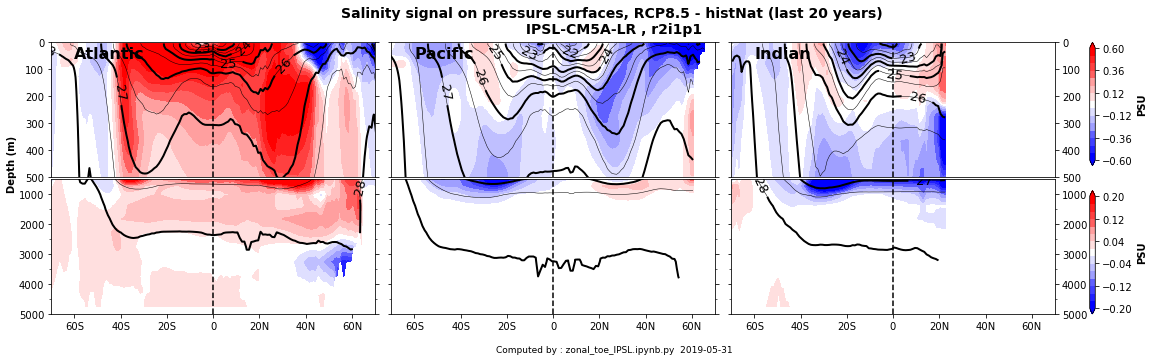

In [33]:
#varname = defVarmme('temp'); v = 'T'
var = varname['var_zonal_w/bowl']
legVar = varname['legVar']
unit = varname['unit']
minmax = varname['minmax_zonal_rcp85']

# -- Create figure and axes instances
fig2, axes2 = plt.subplots(nrows=2, ncols=3, figsize=(17, 5))

deltat=10
domzed = [0,500,5000]
# -- Color map
cmap = custom_div_cmap()
# -- Unit
unit = varname['unit']
# -- Levels
minmax = varname['minmax_zonal_rcp85']
levels = np.linspace(minmax[0], minmax[1], minmax[2]) # For temperature : np.linspace(-2, 2, minmax[2])
minmax2 = varname['minmax_zonal']
levels2 = np.linspace(minmax2[0], minmax2[1], minmax2[2])
ext_cmap = 'both'
# -- Put everything into a dictionary
contourDict = {'cmap':cmap, 'levels':levels, 'levels2':levels2, 'ext_cmap':ext_cmap, 'isopyc':True}

# -- Contourf
# Atlantic
cnplot2 = zon_2Dz(plt, axes2[0,0], axes2[1,0], 'left', lat, depth, varAtl,
                  contourDict, domzed, None, None)

# -- Add colorbar
cb1 = fig2.colorbar(cnplot2[0], ax=[axes2[0,0],axes2[0,1],axes2[0,2]], ticks=levels[::3], fraction=0.015, shrink=1.0, pad=0.05)
cb1.set_label('%s' % (unit,), fontweight='bold')
cb2 = fig2.colorbar(cnplot2[1], ax=[axes2[1,0],axes2[1,1],axes2[1,2]], ticks=levels2[::3], fraction=0.015, shrink=1.0, pad=0.05)
cb2.set_label('%s' % (unit,), fontweight='bold')

# Pacific
cnplot2 = zon_2Dz(plt, axes2[0,1], axes2[1,1], 'mid', lat, depth, varPac,
                  contourDict, domzed, None, None)

# Indian
cnplot2 = zon_2Dz(plt, axes2[0,2], axes2[1,2], 'right', lat, depth, varInd,
                  contourDict, domzed, None, None)

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)


# -- Add title
plotTitle = legVar + ' signal on pressure surfaces, RCP8.5 - histNat (last 20 years) \n %s , %s '%(model_name,run)

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.figtext(.5,.02,'Computed by : zonal_toe_IPSL.ipynb.py  '+date,fontsize=9,ha='center')
plt.figtext(.004,.6,'Depth (m)',rotation='vertical',fontweight='bold')

figureDir = 'models/ToE_z_analysis/'
plotName = 'signal'+v+'_z_IPSL_r2i1p1_rcp85vshistNat'
#plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.pdf', bbox_inches='tight')

# Plot noise in original pressure coordinate 

In [59]:
# Read histNat
varstd = np.ma.std(f.variables[varName][tstart:tend,:,:,:],axis=0)

# -- Make variable bundles for each basin
varAtl_noise = {'name': 'Atlantic', 'var_change': varstd[1,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[1,:,:]}
varPac_noise = {'name': 'Pacific', 'var_change': varstd[2,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[2,:,:]}
varInd_noise = {'name': 'Indian', 'var_change': varstd[3,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[3,:,:]}

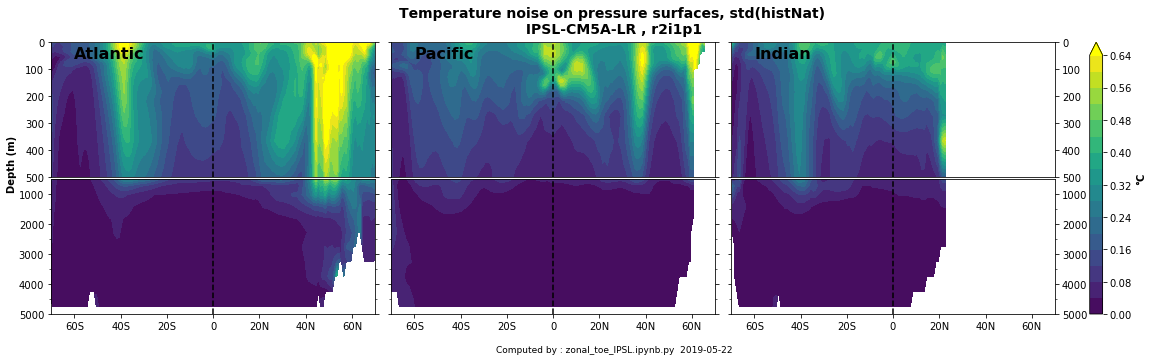

In [68]:
# -- Create figure and axes instances
fig3, axes3 = plt.subplots(nrows=2, ncols=3, figsize=(17, 5))

deltat=10
domzed = [0,500,5000]
# -- Color map
cmap1 = 'viridis'
# -- Unit
unit = varname['unit']
# -- Levels
if v == 'S':
    levels = np.hstack([np.array([0,0.0005,0.002,0.006,0.008]),np.arange(0.02,0.1201,0.02)]) #np.arange(0,0.1201,0.01) #
else:
    levels = np.arange(0,0.651,0.04)
    
levels2 = levels
ext_cmap = 'max'
# -- Put everything into a dictionary
contourDict = {'cmap':cmap1, 'levels':levels, 'levels2':levels2, 'ext_cmap':ext_cmap, 'isopyc':False}

# -- Contourf
# Atlantic
cnplot3 = zon_2Dz(plt, axes3[0,0], axes3[1,0], 'left', lat, depth, varAtl_noise,
                  contourDict, domzed, None, None)
cnplot3[0].cmap.set_over('yellow')
# -- Add colorbar
cb1 = fig3.colorbar(cnplot3[0], ax=axes3.ravel().tolist(), ticks=levels[::2], fraction=0.015, shrink=1.0, pad=0.05)
cb1.set_label('%s' % (unit,), fontweight='bold')

# Pacific
cnplot3 = zon_2Dz(plt, axes3[0,1], axes3[1,1], 'mid', lat, depth, varPac_noise,
                  contourDict, domzed, None, None)

# Indian
cnplot3 = zon_2Dz(plt, axes3[0,2], axes3[1,2], 'right', lat, depth, varInd_noise,
                  contourDict, domzed, None, None)

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)


# -- Add title
plotTitle = legVar + ' noise on pressure surfaces, std(histNat) \n %s , %s '%(model_name,run)

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.figtext(.5,.02,'Computed by : zonal_toe_IPSL.ipynb.py  '+date,fontsize=9,ha='center')
plt.figtext(.004,.6,'Depth (m)',rotation='vertical',fontweight='bold')

figureDir = 'models/ToE_z_analysis/'
plotName = 'noise'+v+'_z_IPSL_r2i1p1_stdhistNat'
#if fig == 'save':
plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.pdf', bbox_inches='tight')

# Plot ToE analyzed on pressure mapped to gamma

In [27]:
# Read ToE mapped to gamma
toe2rho = fz.variables[varName+'ToE2_gamma'][:] + 1860
lev = fz.variables['density'][:]

In [80]:
# -- Plot parameters
model_name = filez.split('.')[1]
run = filez.split('.')[2]
# density domain
rhomin = 21
rhomid = 26
rhomax = 28.5
domrho = [rhomin, rhomid, rhomax]

# -- Make variable bundles for each basin
varAtlrho = {'name': 'Atlantic', 'ToE': toe2rho[1,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None}
varPacrho = {'name': 'Pacific', 'ToE': toe2rho[2,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None}
varIndrho = {'name': 'Indian', 'ToE': toe2rho[3,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None}

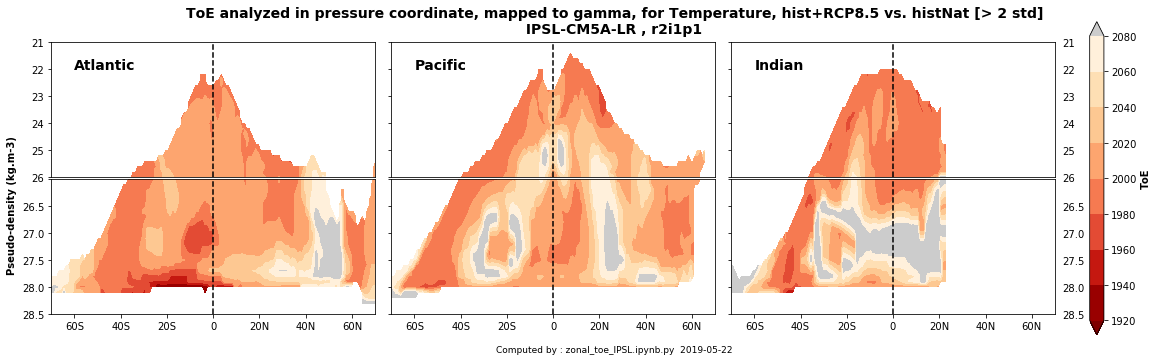

In [82]:
from maps_matplot_lib import zonal_2D

# -- Create figure and axes instances
fig4, axes4 = plt.subplots(nrows=2, ncols=3, figsize=(17, 5))

minyear=1920
deltat=20

# -- Color map
cmap = 'OrRd_r'
# -- Unit
unit = 'ToE'
# -- Levels
minmax = [minyear, 2080.01, deltat]
levels = np.arange(minmax[0], minmax[1], minmax[2])

# -- Contourf
# Atlantic
cnplot4 = zonal_2D(plt, 'ToE', axes4[0,0], axes4[1,0], 'left', lat, lev, varAtlrho, domrho, cmap, levels)
cnplot4[0].cmap.set_over('0.8')
cnplot4[1].cmap.set_over('0.8')

# -- Add colorbar
cb = fig4.colorbar(cnplot4[1], ax=axes4.ravel().tolist(), ticks=levels, fraction=0.015, shrink=2.0, pad=0.05)
cb.set_label('%s' % (unit,), fontweight='bold')

# Pacific
cnplot4 = zonal_2D(plt, 'ToE', axes4[0,1], axes4[1,1], 'mid', lat, lev, varPacrho, domrho, cmap, levels)
cnplot4[0].cmap.set_over('0.8')
cnplot4[1].cmap.set_over('0.8')

# Indian
cnplot4 = zonal_2D(plt, 'ToE', axes4[0,2], axes4[1,2], 'right', lat, lev, varIndrho, domrho, cmap, levels)
cnplot4[0].cmap.set_over('0.8')
cnplot4[1].cmap.set_over('0.8')

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)


# -- Add title
plotTitle = 'ToE analyzed in pressure coordinate, mapped to gamma, for ' + legVar + ', hist+RCP8.5 vs. histNat [> ' + str(multstd) + ' std]' \
    '\n %s , %s '%(model_name,run)

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.figtext(.5,.02,'Computed by : zonal_toe_IPSL.ipynb.py  '+date,fontsize=9,ha='center')
plt.figtext(.004,.6,'Pseudo-density (kg.m-3)',rotation='vertical',fontweight='bold')

figureDir = 'models/ToE_z_analysis/'
plotName = 'toe'+v+'_zmappedtogamma_IPSL_r2i1p1_rcp85vshistNat'
#if fig == 'save':
#plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.pdf', bbox_inches='tight')

# Plot gamma(z)

In [20]:
# -- Make variable bundles for each basin
varAtl = {'name': 'Atlantic', 'var_change': density[1,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[1,:,:]}
varPac = {'name': 'Pacific', 'var_change': density[2,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[2,:,:]}
varInd = {'name': 'Indian', 'var_change': density[3,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':density[3,:,:]}

Text(0.004,0.6,'Depth (m)')

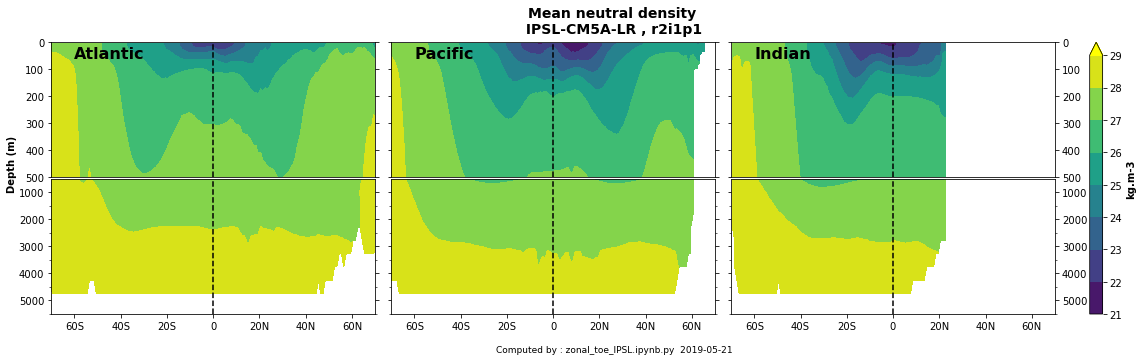

In [21]:
# -- Create figure and axes instances
fig5, axes5 = plt.subplots(nrows=2, ncols=3, figsize=(17, 5))

deltat=10
domzed = [0,500,5500]
# -- Color map
cmap1 = 'viridis'
# -- Unit
unit = 'kg.m-3'
# -- Levels
levels = np.arange(21,29.1)
levels2 = levels
ext_cmap = 'max'
# -- Put everything into a dictionary
contourDict = {'cmap':cmap1, 'levels':levels, 'levels2':levels2, 'ext_cmap':ext_cmap, 'isopyc':False}

# -- Contourf
# Atlantic
cnplot5 = zon_2Dz(plt, axes5[0,0], axes5[1,0], 'left', lat, depth, varAtl,
                  contourDict, domzed, None, None)
# -- Add colorbar
cb1 = fig5.colorbar(cnplot5[0], ax=axes5.ravel().tolist(), ticks=levels, fraction=0.015, shrink=1.0, pad=0.05)
cb1.set_label('%s' % (unit,), fontweight='bold')

# Pacific
cnplot5 = zon_2Dz(plt, axes5[0,1], axes5[1,1], 'mid', lat, depth, varPac,
                  contourDict, domzed, None, None)

# Indian
cnplot5 = zon_2Dz(plt, axes5[0,2], axes5[1,2], 'right', lat, depth, varInd,
                  contourDict, domzed, None, None)

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)


# -- Add title
plotTitle = 'Mean neutral density \n %s , %s '%(model_name,run)

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.figtext(.5,.02,'Computed by : zonal_toe_IPSL.ipynb.py  '+date,fontsize=9,ha='center')
plt.figtext(.004,.6,'Depth (m)',rotation='vertical',fontweight='bold')


# Plot ToE analyzed in density coordinate

In [12]:
if v == 'S':
    filerho = 'cmip5.IPSL-CM5A-LR.toe_zonal_rcp_histNat.nc'
else:
    filerho = 'cmip5.IPSL-CM5A-LR.Temperature_toe_zonal_rcp_histNat.nc'
frho = open_ncfile(indirr+filerho,'r')
ToE2rho = frho.variables[var+'ToE2'][2,:,:,:] + 1860 # index 2 (3rd position) corresponds to run r2i1p1 (ls -U order)
var_change = frho.variables[var+'_change'][2,:,:,:]
ToE2rho.fill_value = 1.e20

In [13]:
if v=='S':
    idx = np.argwhere(var_change.mask==True)
    ToE2rho[idx[:,0],idx[:,1],idx[:,2]] = np.ma.masked

In [14]:
# Read bowl
indir_rcp85 = '/data/ericglod/Density_binning/Prod_density_april15/rcp85/'
fbowl2 = 'cmip5.IPSL-CM5A-LR.rcp85.r2i1p1.an.ocn.Omon.density.ver-v20111119_zon1D.nc'
f2 = open_ncfile(indir_rcp85 + fbowl2 ,'r')
indir_histNat = '/data/ericglod/Density_binning/Prod_density_april15/historicalNat/'
fbowl1 = 'cmip5.IPSL-CM5A-LR.historicalNat.r2i1p1.an.ocn.Omon.density.ver-v20120430.latestX.WARN2.xml_zon1D.nc'
f1 = open_ncfile(indir_histNat+fbowl1,'r')

# Read bowl position
bowl2 = np.ma.average(f2.variables['ptopsigma'][-10:,:,:],axis=0)
bowl1 = np.ma.average(f1.variables['ptopsigma'][-10:,:,:],axis=0)

labBowl = ['histNat','RCP8.5']

In [15]:
deltat=20
finalyear=2100
minyear=1920
# density domain
rhomin = 21
rhomid = 26
rhomax = 28.5
domrho = [rhomin, rhomid, rhomax]

# -- Make variable bundles for each basin
varAtlrho = {'name': 'Atlantic', 'ToE': ToE2rho[1,:,:], 'bowl1': bowl1[1,:], 'bowl2': bowl2[1,:], 'labBowl': labBowl}
varPacrho = {'name': 'Pacific', 'ToE': ToE2rho[2,:,:], 'bowl1': bowl1[2,:], 'bowl2': bowl2[2,:], 'labBowl': labBowl}
varIndrho = {'name': 'Indian', 'ToE': ToE2rho[3,:,:], 'bowl1': bowl1[3,:], 'bowl2': bowl2[3,:], 'labBowl': labBowl}

In [16]:
filerho

'cmip5.IPSL-CM5A-LR.Temperature_toe_zonal_rcp_histNat.nc'

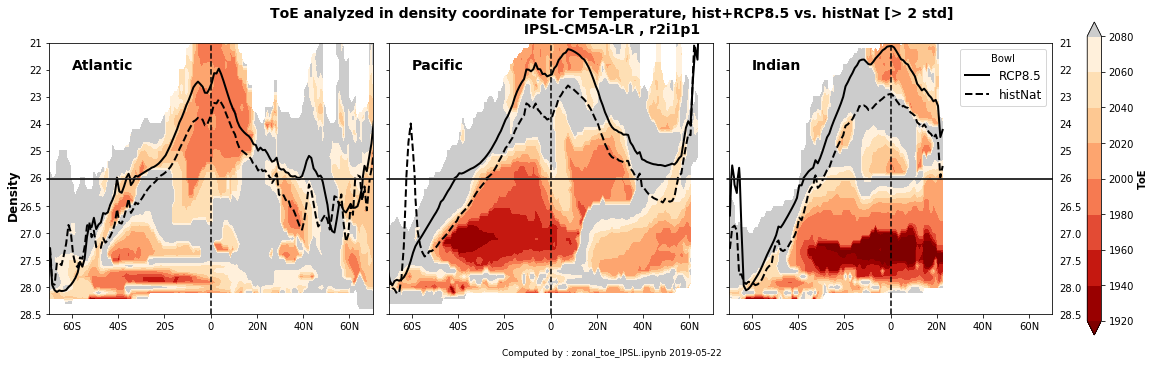

In [18]:
lat2d, lev2d = np.meshgrid(lat,lev)

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

fig6, axes6 = plt.subplots(nrows=2, ncols=3, figsize=(17,5))

minmax = [minyear, finalyear-20 +0.1, deltat]
unit = 'ToE'
cmap = 'OrRd_r'
levels = np.arange(minmax[0], minmax[1], minmax[2])

cnplot6 = zonal_2D(plt, 'ToE', axes6[0, 0], axes6[1, 0], 'left', lat, lev, varAtlrho, domrho, cmap, levels)
cnplot6[0].cmap.set_over('0.8')
cnplot6[1].cmap.set_over('0.8')

cb6 = fig6.colorbar(cnplot6[1],ax=axes6.ravel().tolist(), ticks = levels, fraction=0.015, shrink=2.0, pad=0.05)
cb6.set_label('%s' % (unit,), fontweight='bold')

cnplot6 = zonal_2D(plt, 'ToE', axes6[0, 1], axes6[1, 1], 'mid', lat, lev, varPacrho, domrho, cmap, levels)
cnplot6[0].cmap.set_over('0.8')
cnplot6[1].cmap.set_over('0.8')

cnplot6 = zonal_2D(plt, 'ToE', axes6[0, 2], axes6[1, 2], 'right', lat, lev, varIndrho, domrho, cmap, levels)
cnplot6[0].cmap.set_over('0.8')
cnplot6[1].cmap.set_over('0.8')

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)

# -- Add title
plotTitle = 'ToE analyzed in density coordinate for ' + legVar + ', hist+RCP8.5 vs. histNat [> ' + str(multstd) + ' std]' \
    '\n %s , %s '%(model_name,run)

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')
plt.figtext(.006,.5,'Density',rotation='vertical',horizontalalignment='left',fontsize=12,fontweight='bold')
plt.figtext(.5,.01,'Computed by : zonal_toe_IPSL.ipynb '+date,fontsize=9,ha='center')

figureDir = 'models/ToE_z_analysis/'
plotName = 'toe'+v+'_gamma_IPSL_r2i1p1_rcp85vshistNat'
plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.pdf', bbox_inches='tight')

# Plot ToE signal in density coordinate

In [19]:
# Read bowl
indir_rcp85 = '/data/ericglod/Density_binning/Prod_density_april15/rcp85/'
fbowl2 = 'cmip5.IPSL-CM5A-LR.rcp85.r2i1p1.an.ocn.Omon.density.ver-v20111119_zon1D.nc'
f2 = open_ncfile(indir_rcp85 + fbowl2 ,'r')
indir_histNat = '/data/ericglod/Density_binning/Prod_density_april15/historicalNat/'
fbowl1 = 'cmip5.IPSL-CM5A-LR.historicalNat.r2i1p1.an.ocn.Omon.density.ver-v20120430.latestX.WARN2.xml_zon1D.nc'
f1 = open_ncfile(indir_histNat+fbowl1,'r')

# Read bowl position
bowl2 = np.ma.average(f2.variables['ptopsigma'][-10:,:,:],axis=0)
bowl1 = np.ma.average(f1.variables['ptopsigma'][-10:,:,:],axis=0)

labBowl = ['histNat','RCP8.5']

In [20]:
unit = varname['unit']
minmax = varname['minmax_zonal_rcp85']
# -- Make variable bundles for each basin
varAtl = {'name': 'Atlantic', 'var_change': var_change[1,:,:], 'var_mean':None, 'bowl1': bowl1[1,:], 'bowl2': bowl2[1,:], 'labBowl': labBowl}
varPac = {'name': 'Pacific', 'var_change': var_change[2,:,:], 'var_mean':None, 'bowl1': bowl1[2,:], 'bowl2': bowl2[2,:], 'labBowl': labBowl}
varInd = {'name': 'Indian', 'var_change': var_change[3,:,:], 'var_mean':None, 'bowl1': bowl1[3,:], 'bowl2': bowl2[3,:], 'labBowl': labBowl}

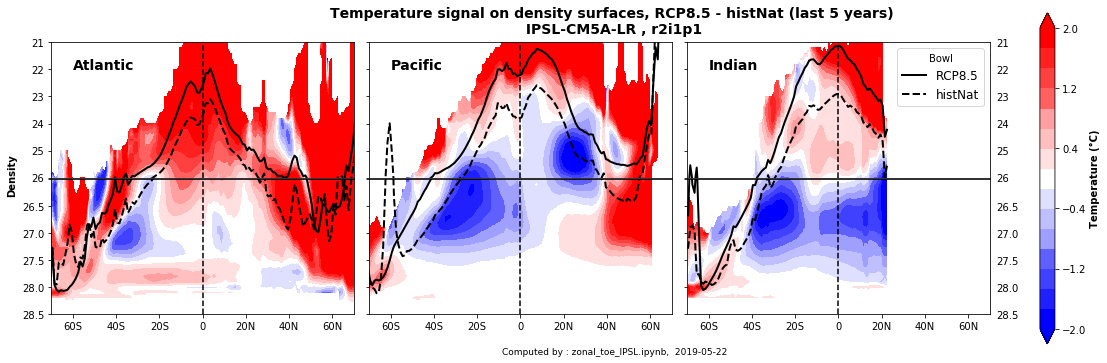

In [23]:
fig7, axes7 = plt.subplots(nrows=2, ncols=3, figsize=(17,5))

levels = np.linspace(-2, 2, minmax[2])
cmap = custom_div_cmap() # plt.get_cmap('bwr')

cnplot7 = zonal_2D(plt, 'total_mme', axes7[0, 0], axes7[1, 0], 'left', lat, lev, varAtl, domrho, cmap, levels)

cnplot7 = zonal_2D(plt, 'total_mme', axes7[0, 1], axes7[1, 1], 'mid', lat, lev, varPac, domrho, cmap, levels)

cnplot7 = zonal_2D(plt, 'total_mme', axes7[0, 2], axes7[1, 2], 'right', lat, lev, varInd, domrho, cmap, levels)

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)

cb7 = plt.colorbar(cnplot7[0], ax=axes7.ravel().tolist(), ticks=levels[::3], fraction=0.015, shrink=2.0, pad=0.05)
cb7.set_label('%s (%s)' % (legVar, unit), fontweight='bold')

plotTitle = legVar + ' signal on density surfaces, RCP8.5 - histNat (last 5 years) \n %s , %s '%(model_name,run)

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')
plt.figtext(.004,.55,'Density',rotation='vertical',fontweight='bold')
plt.figtext(.5,.015,'Computed by : zonal_toe_IPSL.ipynb,  '+date,fontsize=9,ha='center')

figureDir = 'models/ToE_z_analysis/'
plotName = 'signal'+v+'_gamma_IPSL_r2i1p1_rcp85vshistNat'
#plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.pdf', bbox_inches='tight')

# Plot noise in density coordinate

In [24]:
file_noise = 'cmip5.IPSL-CM5A-LR.historicalNat.r2i1p1.an.ocn.Omon.density.ver-v20120430.latestX.WARN2.xml_zon2D.nc'
fnoise = open_ncfile(indir_histNat+file_noise,'r')
varstdrho = np.ma.std(fnoise.variables[var][tstart:tend,:,:,:],axis=0)

varAtl = {'name': 'Atlantic', 'var_std': varstdrho[1,:,:], 'var_mean':None, 'bowl': bowl1[1,:]}
varPac = {'name': 'Pacific', 'var_std': varstdrho[2,:,:], 'var_mean':None, 'bowl': bowl1[2,:]}
varInd = {'name': 'Indian', 'var_std': varstdrho[3,:,:], 'var_mean':None, 'bowl': bowl1[3,:]}

# density domain
rhomin = 21
rhomid = 26
rhomax = 28.5
domrho = [rhomin, rhomid, rhomax]

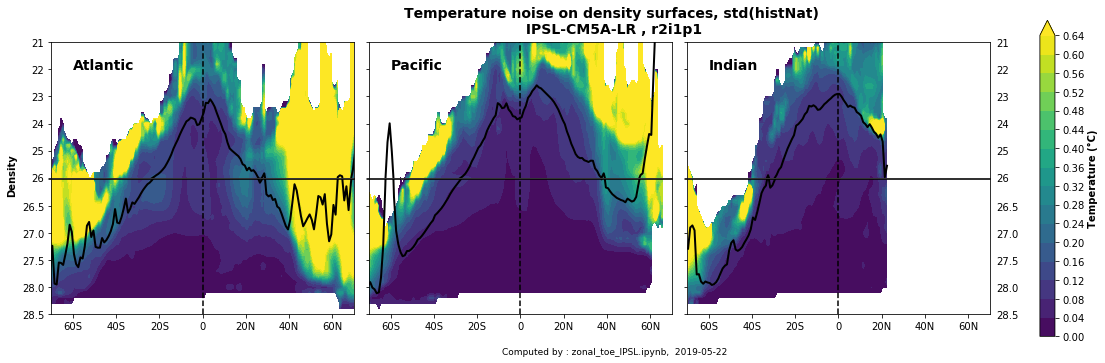

In [26]:
fig8, axes8 = plt.subplots(nrows=2, ncols=3, figsize=(17,5))

# -- Levels
if v == 'S':
    levels = np.hstack([np.array([0,0.0005,0.002,0.006,0.008]),np.arange(0.02,0.1201,0.02)]) #np.arange(0,0.1201,0.01) #
else:
    levels = np.arange(0,0.651,0.04)
cmap = 'viridis'

cnplot8 = zonal_2D(plt, 'var_std', axes8[0, 0], axes8[1, 0], 'left', lat, lev, varAtl, domrho, cmap, levels)

cnplot8 = zonal_2D(plt, 'var_std', axes8[0, 1], axes8[1, 1], 'mid', lat, lev, varPac, domrho, cmap, levels)

cnplot8 = zonal_2D(plt, 'var_std', axes8[0, 2], axes8[1, 2], 'right', lat, lev, varInd, domrho, cmap, levels)

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)

cb8 = plt.colorbar(cnplot8[0], ax=axes8.ravel().tolist(), ticks=levels, fraction=0.015, shrink=2.0, pad=0.05)
cb8.set_label('%s (%s)' % (legVar, unit), fontweight='bold')

plotTitle = legVar + ' noise on density surfaces, std(histNat) \n %s , %s '%(model_name,run)

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')
plt.figtext(.004,.55,'Density',rotation='vertical',fontweight='bold')
plt.figtext(.5,.015,'Computed by : zonal_toe_IPSL.ipynb,  '+date,fontsize=9,ha='center')

figureDir = 'models/ToE_z_analysis/'
plotName = 'noise'+v+'_gamma_IPSL_r2i1p1_rcp85vshistNat'
#plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.pdf', bbox_inches='tight')

# Plot difference between ToE analyzed on density surfaces and ToE analyzed on pressure surfaces, mapped to gamma 

In [28]:
ToEdiff = toe2rho - ToE2rho # pressure - density

varAtldiff = {'name': 'Atlantic', 'var_change': ToEdiff[1,:,:], 'var_mean':None, 'bowl1': None, 'bowl2': None, 'labBowl':None}
varPacdiff = {'name': 'Pacific', 'var_change': ToEdiff[2,:,:], 'var_mean':None, 'bowl1': None, 'bowl2': None, 'labBowl':None}
varInddiff = {'name': 'Indian', 'var_change': ToEdiff[3,:,:], 'var_mean':None, 'bowl1': None, 'bowl2': None, 'labBowl':None}

# density domain
rhomin = 21
rhomid = 26
rhomax = 28.5
domrho = [rhomin, rhomid, rhomax]

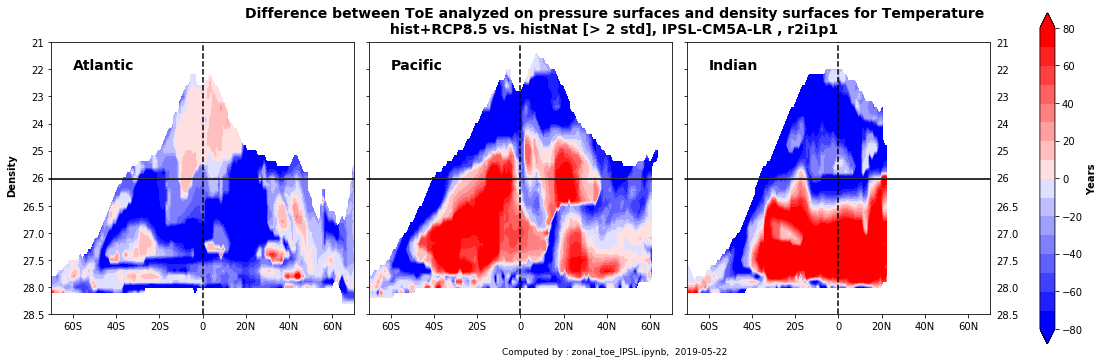

In [34]:
fig9, axes9 = plt.subplots(nrows=2, ncols=3, figsize=(17,5))

levels = np.arange(-80,81,10)
cmap = custom_div_cmap()

unit='Years'

cnplot9 = zonal_2D(plt, 'total_mme', axes9[0, 0], axes9[1, 0], 'left', lat, lev, varAtldiff, domrho, cmap, levels)

cnplot9 = zonal_2D(plt, 'total_mme', axes9[0, 1], axes9[1, 1], 'mid', lat, lev, varPacdiff, domrho, cmap, levels)

cnplot9 = zonal_2D(plt, 'total_mme', axes9[0, 2], axes9[1, 2], 'right', lat, lev, varInddiff, domrho, cmap, levels)

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)

cb9 = plt.colorbar(cnplot9[0], ax=axes9.ravel().tolist(), ticks=levels[::2], fraction=0.015, shrink=2.0, pad=0.05)
cb9.set_label('%s' % (unit), fontweight='bold')

plotTitle = 'Difference between ToE analyzed on pressure surfaces and density surfaces for ' + legVar + '\n hist+RCP8.5 vs. histNat [> ' + str(multstd) + ' std], ' \
    '%s , %s '%(model_name,run)

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')
plt.figtext(.004,.55,'Density',rotation='vertical',fontweight='bold')
plt.figtext(.5,.015,'Computed by : zonal_toe_IPSL.ipynb,  '+date,fontsize=9,ha='center')

figureDir = 'models/ToE_z_analysis/'
plotName = 'ToEdiff_'+v+'_zvsgamma_IPSL_r2i1p1_rcp85vshistNat'
plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.eps', bbox_inches='tight')

In [31]:
filez

'cmip5.IPSL-CM5A-LR.r2i1p1.Temperature_toe_zonal_rcp_histNat.nc'

In [32]:
filerho

'cmip5.IPSL-CM5A-LR.Temperature_toe_zonal_rcp_histNat.nc'

# Plot difference between ToE of temperature and ToE of salinity analyzed in z 

In [4]:
filezT = 'cmip5.IPSL-CM5A-LR.r2i1p1.Temperature_toe_zonal_rcp_histNat.nc'
fzT = open_ncfile(indirz+filezT,'r')
filezS = 'cmip5.IPSL-CM5A-LR.r2i1p1.Salinity_toe_zonal_rcp_histNat.nc'
fzS = open_ncfile(indirz+filezS,'r')

In [13]:
toe2zT = fzT.variables['temperatureToE2_z'][:,:,:] + 1860
toe2zS = fzS.variables['salinityToE2_z'][:,:,:] + 1860
depth = fz.variables['depth'][:]
lat = fz.variables['latitude'][:]
lev = fz.variables['density'][:]

In [18]:
toe_change = toe2zS-toe2zT

# -- Make variable bundles for each basin
varAtlz = {'name': 'Atlantic', 'var_change': toe_change[1,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':None}
varPacz = {'name': 'Pacific', 'var_change': toe_change[2,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':None}
varIndz = {'name': 'Indian', 'var_change': toe_change[3,:,:], 'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':None}

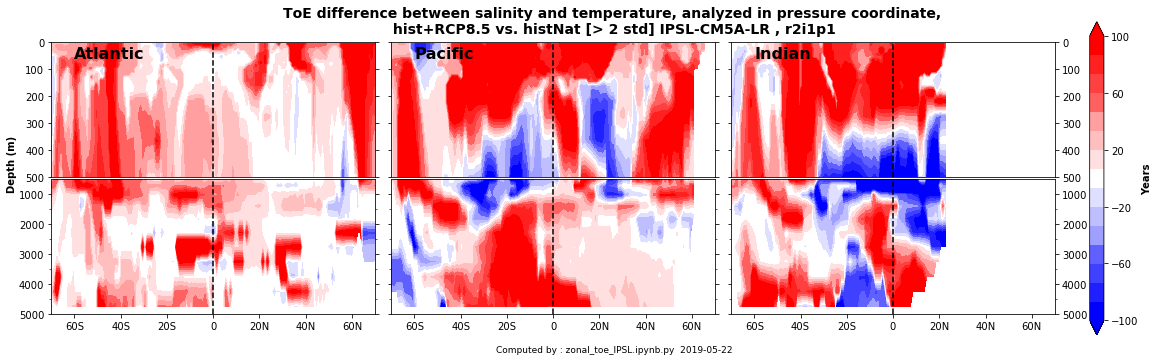

In [35]:
# -- Create figure and axes instances
fig10, axes10 = plt.subplots(nrows=2, ncols=3, figsize=(17, 5))

domzed = [0,500,5000]
# -- Color map
cmap = custom_div_cmap()
# -- Unit
unit = 'Years'
# -- Levels
minmax = [-100,100, 16]
levels = np.linspace(minmax[0], minmax[1], minmax[2])
ext_cmap = 'both'
# -- Put everything into a dictionary
contourDict = {'cmap':cmap, 'levels':levels, 'levels2':levels, 'ext_cmap':ext_cmap, 'isopyc':False}

# -- Contourf
# Atlantic
cnplot10 = zon_2Dz(plt, axes10[0,0], axes10[1,0], 'left', lat, depth, varAtlz,
                  contourDict, domzed, None, None)

# -- Add colorbar
cb10 = fig10.colorbar(cnplot10[1], ax=axes10.ravel().tolist(), ticks=levels[::3], fraction=0.015, shrink=2.0, pad=0.05)
cb10.set_label('%s' % (unit,), fontweight='bold')

# Pacific
cnplot10 = zon_2Dz(plt, axes10[0,1], axes10[1,1], 'mid', lat, depth, varPacz,
                  contourDict, domzed, None, None)

# Indian
cnplot10 = zon_2Dz(plt, axes10[0,2], axes10[1,2], 'right', lat, depth, varIndz,
                  contourDict, domzed, None, None)

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)


# -- Add title
plotTitle = 'ToE difference between salinity and temperature, analyzed in pressure coordinate, \n hist+RCP8.5 vs. histNat [> ' + str(multstd) + ' std]' \
    ' %s , %s '%(model_name,run)

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.figtext(.5,.02,'Computed by : zonal_toe_IPSL.ipynb.py  '+date,fontsize=9,ha='center')
plt.figtext(.004,.6,'Depth (m)',rotation='vertical',fontweight='bold')

figureDir = 'models/ToE_z_analysis/'
plotName = 'ToEdiff_SvsT_z_IPSL_r2i1p1_rcp85vshistNat'
plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.pdf', bbox_inches='tight')

In [41]:
toe2rhoT = fzT.variables['temperatureToE2_gamma'][:,:,:] + 1860
toe2rhoS = fzS.variables['salinityToE2_gamma'][:,:,:] + 1860

toe_change_rho = toe2rhoS - toe2rhoT

# -- Make variable bundles for each basin
varAtlrho = {'name': 'Atlantic', 'var_change': toe_change_rho[1,:,:], 'var_mean':None, 'bowl1': None, 'bowl2': None, 'labBowl': None}
varPacrho = {'name': 'Pacific', 'var_change': toe_change_rho[2,:,:], 'var_mean':None, 'bowl1': None, 'bowl2': None, 'labBowl': None}
varIndrho = {'name': 'Indian', 'var_change': toe_change_rho[3,:,:], 'var_mean':None, 'bowl1': None, 'bowl2': None, 'labBowl': None}

# density domain
rhomin = 21
rhomid = 26
rhomax = 28.5
domrho = [rhomin, rhomid, rhomax]

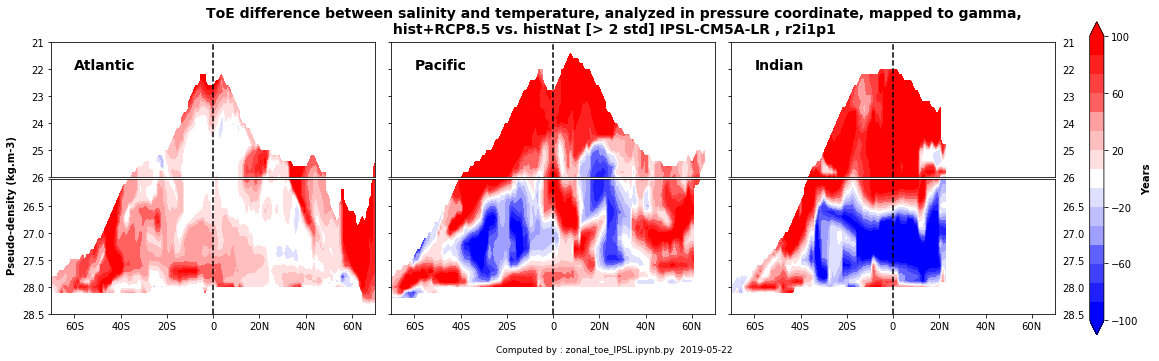

In [43]:
# -- Create figure and axes instances
fig11, axes11 = plt.subplots(nrows=2, ncols=3, figsize=(17, 5))

# -- Contourf
# Atlantic
cnplot11 = zonal_2D(plt, 'total_mme', axes11[0,0], axes11[1,0], 'left', lat, lev, varAtlrho, domrho, cmap, levels)

# -- Add colorbar
cb11 = fig11.colorbar(cnplot11[1], ax=axes11.ravel().tolist(), ticks=levels[::3], fraction=0.015, shrink=2.0, pad=0.05)
cb11.set_label('%s' % (unit,), fontweight='bold')

# Pacific
cnplot11 = zonal_2D(plt, 'total_mme', axes11[0,1], axes11[1,1], 'mid', lat, lev, varPacrho, domrho, cmap, levels)

# Indian
cnplot11 = zonal_2D(plt, 'total_mme', axes11[0,2], axes11[1,2], 'right', lat, lev, varIndrho, domrho, cmap, levels)

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)


# -- Add title
plotTitle = 'ToE difference between salinity and temperature, analyzed in pressure coordinate, mapped to gamma,\n hist+RCP8.5 vs. histNat [> ' + str(multstd) + ' std] ' \
    '%s , %s '%(model_name,run)

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.figtext(.5,.02,'Computed by : zonal_toe_IPSL.ipynb.py  '+date,fontsize=9,ha='center')
plt.figtext(.004,.6,'Pseudo-density (kg.m-3)',rotation='vertical',fontweight='bold')

figureDir = 'models/ToE_z_analysis/'
plotName = 'ToEdiff_SvsT_zmappedtogamma_IPSL_r2i1p1_rcp85vshistNat'
#if fig == 'save':
plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.pdf', bbox_inches='tight')

# Plot signal mapped to gamma

In [ ]:
from binDensity import rhonGrid
# Density grid
targetrho, s_sax, del_s, N_s = rhonGrid(19, 26, 28.501, 0.2, 0.1)

# Define Gamma/depth relationship for mapping
gammaz = np.ma.average(f.variables['density'][tstart:tend+95,:,:,:],axis=0)

# Read signal
signal = fz.variables[varName+'_change'][:]

# Map to gamma
signal_gamma = maptogamma(signal,gammaz,targetrho)


In [ ]:
# -- Make variable bundles for each basin
varAtl = {'name': 'Atlantic', 'var_change': toe_change_rho[1,:,:], 'var_mean':None, 'bowl1': None, 'bowl2': None, 'labBowl': None}
varPac = {'name': 'Pacific', 'var_change': toe_change_rho[2,:,:], 'var_mean':None, 'bowl1': None, 'bowl2': None, 'labBowl': None}
varInd = {'name': 'Indian', 'var_change': toe_change_rho[3,:,:], 'var_mean':None, 'bowl1': None, 'bowl2': None, 'labBowl': None}

# density domain
rhomin = 21
rhomid = 26
rhomax = 28.5
domrho = [rhomin, rhomid, rhomax]

In [ ]:
# -- Create figure and axes instances
fig12, axes12 = plt.subplots(nrows=2, ncols=3, figsize=(17, 5))

# -- Color map
cmap = custom_div_cmap()
# -- Unit
unit = varname['unit']
# -- Levels
minmax = varname['minmax_zonal_rcp85']
levels = np.linspace(minmax[0], minmax[1], minmax[2])

# -- Contourf
# Atlantic
cnplot12 = zonal_2D(plt, 'total_mme', axes12[0,0], axes12[1,0], 'left', lat, lev, varAtl, domrho, cmap, levels)

# -- Add colorbar
cb12 = fig11.colorbar(cnplot12[1], ax=axes12.ravel().tolist(), ticks=levels[::3], fraction=0.015, shrink=2.0, pad=0.05)
cb12.set_label('%s' % (unit,), fontweight='bold')

# Pacific
cnplot12 = zonal_2D(plt, 'total_mme', axes12[0,1], axes12[1,1], 'mid', lat, lev, varPac, domrho, cmap, levels)

# Indian
cnplot12 = zonal_2D(plt, 'total_mme', axes12[0,2], axes12[1,2], 'right', lat, lev, varInd, domrho, cmap, levels)

plt.subplots_adjust(hspace=.01, wspace=0.05, left=0.04, right=0.86)


# -- Add title
plotTitle = legVar + ' signal, analyzed on pressure surfaces, mapped to gamma, RCP8.5 - histNat (last 5 years) \n' \
    '%s , %s '%(model_name,run)

plt.suptitle(plotTitle, fontweight='bold', fontsize=14, verticalalignment='top')

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.figtext(.5,.02,'Computed by : zonal_toe_IPSL.ipynb.py  '+date,fontsize=9,ha='center')
plt.figtext(.004,.6,'Pseudo-density (kg.m-3)',rotation='vertical',fontweight='bold')

figureDir = 'models/ToE_z_analysis/'
plotName = 'signal_zmappedtogamma_IPSL_r2i1p1_rcp85vshistNat'
#if fig == 'save':
#plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.pdf', bbox_inches='tight')